### DBSCAN : density-based clustering applications with noise
<pre>
(가) 장점
- 클러스터의 개수를 미리 지정할 필요가 없다.
- 복잡한 형상도 찾을 수 있다.
- 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있다.
- 병합 군집이나 k-평균보다 다소 느리지만 비교적 큰 데이터 셋에도 적용가능
</pre>

## 간단한 설명
<pre>
(가) 특성 공간에서 가까이 있는 데이터가 많아 붐비는 지역의 포인트를 찾는다.
(나) 밀집 지역(dense region) - 붐비는 지역
(다) DBSCAN의 아이디어는 데이터의 밀집 지역이 한 클러스터를 구성하며 비교적 비어있는 지역을 경계로 다른 클러스터와 구분된다는 것이다.
</pre>

<img src="img/DBSCAN01.png"><br>
<img src="img/DBSCAN03.png"><br>
<img src="img/DBSCAN04.png"><br>
<img src="img/DBSCAN05.png"><br>
<img src="img/DBSCAN06.png"><br>

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


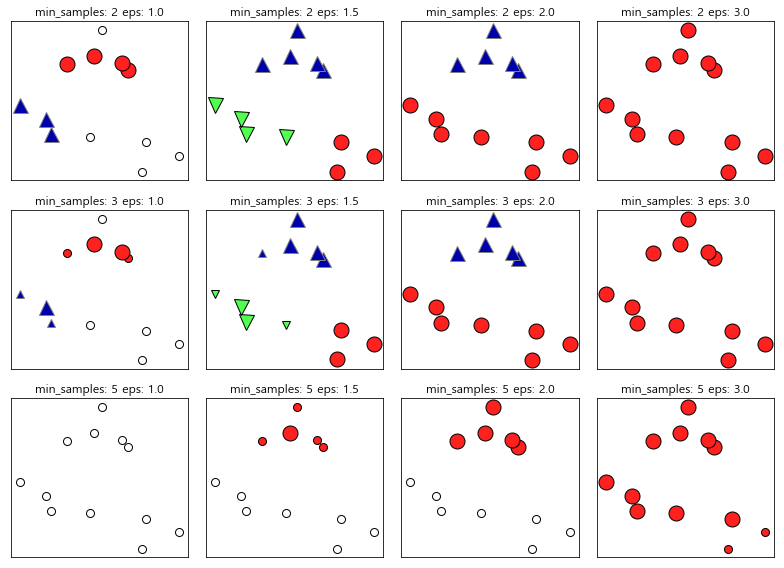

In [1]:
import mglearn
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline

### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

mglearn.plots.plot_dbscan()

### 그림 설명
<pre>
(1) core point(핵심 포인트) : 밀집 지역에 있는 포인트
   한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 개수만큼 들어 있다면.. 이 데이터를 핵심 샘플로 분류
(2) eps보다 가까운 핵심 샘플은 DBSCAN에 의해 동일한 클러스터로 합쳐진다.
</pre>

### 동작
<pre>
(가) 알고리즘을 시작 시에 무작위로 포인트를 선택
(나) 포인트에서 eps 거리 안의 모든 포인트를 찾는다.
(다) 만약 eps 거리안의 포인트 수가 min_samples보다 적다면 그 포인트는 어떤 클래스에도 속하지 않는 잡음(noise)로 레이블
(라) 핵심 샘플로 레이블 후, 그 포인트의 모든 이웃을 살펴보다.
(마) 만약 어떤 클러스터에도 할당되지 않았다면 바로 전의 만든 클러스터로 레이블을 할당. 핵심 샘플이면 그 포인트의 이웃을 차례로 방문
(바) 이런 식으로 계속 진행하여 클러스터는 eps 거리 안에 더 이상 핵심 샘플이 없을 때까지 자라난다.
</pre>

### 종류
<pre>
핵심 샘플
경계 포인트 (핵심 포인트에서 eps 거리 안에 있는 포인트)
잡음 포인트 
</pre>

### 연습해보기

Text(0,0.5,'특성 1')

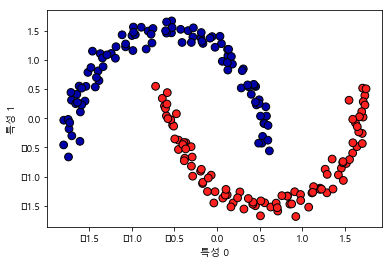

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# 클러스터 할당을 표시한다.
plt.scatter(X_scaled[:,0], X_scaled[:,1], 
           c=clusters, 
           cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")